_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)                131796    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                850       
Total para

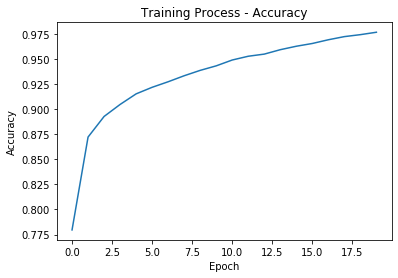

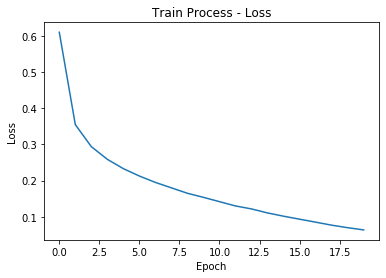

10000/10000 [==============================] - 1s 85us/step
Accuary of the test data= 0.9156
Loss of the test data= 0.36254254293441773
prediction：Ankle boot   reality：Ankle boot
prediction：Pullover   reality：Pullover
prediction：Trouser   reality：Trouser
prediction：Trouser   reality：Trouser
prediction：Shirt   reality：Shirt
prediction：Trouser   reality：Trouser
prediction：Coat   reality：Coat
prediction：Shirt   reality：Shirt
prediction：Sandal   reality：Sandal
prediction：Sneaker   reality：Sneaker
prediction：Coat   reality：Coat
prediction：Sandal   reality：Sandal
prediction：Sneaker   reality：Sneaker
prediction：Dress   reality：Dress
prediction：Coat   reality：Coat
prediction：Trouser   reality：Trouser
prediction：Pullover   reality：Pullover
prediction：Coat   reality：Coat
prediction：Bag   reality：Bag
prediction：T-shirt/top   reality：T-shirt/top


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#seperate the fashion MNIST dataset
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

#normalize
x_train=x_train/255
x_test=x_test/255

#one-hot-encoding-> Have 10 item(output=10)
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

#Let the images convert to the array
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

#Classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

#Create model
model=Sequential()

#Layer1 -convolution
model.add(Conv2D(filters=32,
                 kernel_size=(5,5),
                 padding="same",
                 input_shape=(28,28,1),
                 activation="relu",
                 kernel_initializer='random_uniform',
                 bias_initializer='zeros'
                ))
#Layer2 -maxpooling
model.add(MaxPooling2D(2,2))
#Layer3 -convolution
model.add(Conv2D(filters=32,
                 kernel_size=(5,5),
                 padding="same",
                 activation="relu",
                 kernel_initializer='random_uniform',
                 bias_initializer='zeros'
                ))
#Layer4 -maxpooling
model.add(MaxPooling2D(2,2))
#Layer5 -flatten
model.add(Flatten())
#Layer6 -fully connected
model.add(Dense(units=84,
                activation="relu",
                kernel_initializer='random_uniform',
                bias_initializer='zeros'
               ))
#Layer7 -fully connected
model.add(Dense(units=10,
                activation="softmax"))
print(model.summary())

#Make sure that GPU is used
print("GPU Available:　",tf.test.is_gpu_available())

#Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=['accuracy'])

#Train the model
train_history=model.fit(x=x_train,
                        y=y_train,
                        epochs=20,
                        validation_split=0.2,
                        batch_size=128,
                        verbose=2)

#Plot the graph
plt.plot(train_history.history['acc'])
plt.title("Training Process - Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()
plt.plot(train_history.history['loss'])
plt.title("Train Process - Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#Result
result=model.evaluate(x_test,y_test,verbose=1)
print("Accuary of the test data=",result[1])
print("Loss of the test data=",result[0])

#Prediction
predictions = model.predict(x_test)
for i in range(20):
    pre = class_names[np.argmax(predictions[i])]
    tar = class_names[np.argmax(y_test[i])]
    print("prediction：%s   reality：%s" % (pre, tar))
